# Uploading Finetuning Data to HF:
Before doing this:
- collect all images and upload them to Colab
- caption all the images (using blip/clip etc) and create a metadata.csv file (upload that to colab too)
- create a HF Dataset Repo

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
from huggingface_hub import login

login(token="")

In [6]:
import os
print(sorted(os.listdir("/content/images")))


['20250505_0838_studio_ghibli_office_scene_simple_co_by_castcreations_djp7d22-250t.jpg', '2pac_last_photo___09_08_1996__studio_ghibli_style__by_tonyruiz2002_djhee3e-414w.jpg', 'Lx4OpET.jpeg', '_dreamy_sunset_street___by_djvisuals_djp65ur-414w.jpg', '_fanart_ghibli_studios_animation_style_by_avafleu_djborjv-300w.jpg', '_ghibli_studios_animation_style_fanart_by_avafleu_djbpd8r-250t.jpg', 'a-cosy-street-i-drew-inspired-by-studio-ghibli-works.webp', 'a_car_running_in_a_street__studio_ghibli_version__by_sandstudios_djoiiga-414w.jpg', 'aaron-newton-aaron-newton-thumbnail.jpg', 'adam-wilson-adam-wilson-snapp.jpg', 'ahmx-beyrouthi-01.jpg', 'aj-petrie-onsen3bcrnk900rw2-as.jpg', 'alba-ballesta-gonzalez-eboshi.jpg', 'alberto-trujillo-fbaked.jpg', 'alec-cameron-image-8.jpg', 'aleksandra-jankova-aleksandra-jankova-environment-day-scene.jpg', 'alexis-jimenez-spiritedawaystill-1.jpg', 'alfven-ato-ghibli.jpg', 'amirah-sauer-studioghibli-study-final.jpg', 'anastasiya-moiseeva-fossa-anastasiya-moiseeva-

In [7]:
from datasets import Dataset, Image
import pandas as pd
import os

# Your paths
image_folder = "/content/images"
csv_path = os.path.join(image_folder, "metadata.csv")

# Load CSV
df = pd.read_csv(csv_path)

# Add full image paths
df["image"] = df["file_name"].apply(lambda fn: os.path.join(image_folder, fn))
df = df[["image", "caption"]]

# Convert to HF Dataset
ds = Dataset.from_pandas(df).cast_column("image", Image())

# Push to hub
ds.push_to_hub("ibrahim7004/lora-ghibli-images", split="train")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/604 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ibrahim7004/lora-ghibli-images/commit/afeb99317dff611e981bd97f57e8066f0f411cb1', commit_message='Upload dataset', commit_description='', oid='afeb99317dff611e981bd97f57e8066f0f411cb1', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/ibrahim7004/lora-ghibli-images', endpoint='https://huggingface.co', repo_type='dataset', repo_id='ibrahim7004/lora-ghibli-images'), pr_revision=None, pr_num=None)

---

# Finetuning:

In [2]:
!pip install -U peft --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.1/411.1 kB 6.9 MB/s eta 0:00:00


In [1]:
!pip install git+https://github.com/huggingface/diffusers
!pip install accelerate wand
!pip install -r https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/requirements.txt

!accelerate config default
# accelerate configuration saved at $HOME/.cache/huggingface/accelerate/default_config.yaml

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-qhpo_ype
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-qhpo_ype
  Resolved https://github.com/huggingface/diffusers to commit 01abfc873659e29a8d002f20782fa5b5e6d03f9c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.34.0.dev0-py3-none-any.whl size=3659261 sha256=f056ebd60f36836021372da2a37494f106fda181e5694c77eab100c6308e6c93
  Stored in directory: /tmp/pip-ephem-wheel-cache-xp0mnchb/wheels/90/fb/48/a310c271ab42899362ff272062ced42133e5c4c9d0ce77df68
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.33.1
    Uninstalling diffusers-0.33.1:
      Successfully uninstalled diffusers-0.33.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 3.0 MB/s et

In [3]:
import wandb
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler, AutoPipelineForText2Image
from huggingface_hub import model_info

In [4]:
!wget -q https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/train_text_to_image_lora.py

In [5]:
!mkdir -p ./finetune_lora/ghibli

!accelerate launch --mixed_precision="bf16" train_text_to_image_lora.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --dataset_name="ibrahim7004/lora-ghibli-images" \
  --caption_column="caption" \
  --dataloader_num_workers=8 \
  --resolution=512 \
  --center_crop \
  --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=3000 \
  --learning_rate=1e-04 \
  --max_grad_norm=1 \
  --lr_scheduler="cosine" \
  --lr_warmup_steps=0 \
  --output_dir="./finetune_lora/ghibli" \
  --checkpointing_steps=500 \
  --validation_prompt="A serene Ghibli-style landscape with a girl standing in a sunlit forest, surrounded by glowing flowers and magical creatures" \
  --seed=1337

2025-05-11 17:09:04.100166: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746983344.121161    2425 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746983344.127543    2425 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
05/11/2025 17:09:08 - INFO - __main__ - Distributed environment: DistributedType.NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: bf16

scheduler_config.json: 100% 308/308 [00:00<00:00, 2.52MB/s]
{'clip_sample_range', 'sample_max_value', 'thresholding', 'variance_type', 'rescale_betas_zero_snr', 'dynamic_thresholding_ratio', 'timestep_spacing', 'prediction_type'} was not found in config.

In [6]:
import os
import time
from google.colab import files

weights_path = "/content/finetune_lora/ghibli/pytorch_lora_weights.safetensors"

print("⏳ Waiting for training to finish and weights file to appear...")
while not os.path.exists(weights_path):
    time.sleep(10)  # Check every 10 seconds

print("Weights file found. Downloading to your local machine...")
files.download(weights_path)

⏳ Waiting for training to finish and weights file to appear...
Weights file found. Downloading to your local machine...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

# Using the Finetuned Model:

In [8]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
from PIL import Image

# Base model
base_model = "runwayml/stable-diffusion-v1-5"

# Load pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    base_model,
    torch_dtype=torch.float16
)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# Load LoRA weights
pipe.unet.load_attn_procs("./finetune_lora/ghibli/pytorch_lora_weights.safetensors")
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/diffusers/loaders/unet.py:212: FutureWarning: `load_attn_procs` is deprecated and will be removed in version 0.40.0. Using the `load_attn_procs()` method has been deprecated and will be removed in a future version. Please use `load_lora_adapter()`.
  deprecate("load_attn_procs", "0.40.0", deprecation_message)


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.34.0.dev0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/500 [00:00<?, ?it/s]

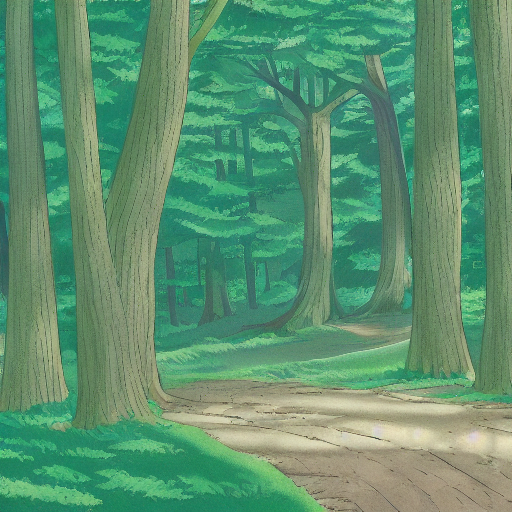

In [29]:
prompt = "A ghibli themed forest background"
image = pipe(prompt, num_inference_steps=500).images[0]

from IPython.display import display
display(image)

# Uploading the weights file to HF for later use:
- the code automatically creates a new Model repo
- the file can later be re-used without any need for retraining, just import it via the created HF repo when importing the stableDiffusion pipeline

In [ ]:
from huggingface_hub import login

login(token="")

- To instead upload the entire model (inlcuding weights file) to HF:

In [32]:
from huggingface_hub import HfApi, upload_file

# Define repo ID and file path
repo_id = "ibrahim7004/ghibli-stableDiff-finetuned"
weights_path = "/content/finetune_lora/ghibli/pytorch_lora_weights.safetensors"

# Create the repo (will skip if it already exists)
api = HfApi()
api.create_repo(repo_id=repo_id, repo_type="model", exist_ok=True)

# Upload only the weights file
upload_file(
    path_or_fileobj=weights_path,
    path_in_repo="pytorch_lora_weights.safetensors",
    repo_id=repo_id,
    repo_type="model"
)

pytorch_lora_weights.safetensors:   0%|          | 0.00/3.23M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/ibrahim7004/ghibli-stableDiff-finetuned/commit/73ffb7940e7f1f8a2f5a204d8d0fa83f817abcc0', commit_message='Upload pytorch_lora_weights.safetensors with huggingface_hub', commit_description='', oid='73ffb7940e7f1f8a2f5a204d8d0fa83f817abcc0', pr_url=None, repo_url=RepoUrl('https://huggingface.co/ibrahim7004/ghibli-stableDiff-finetuned', endpoint='https://huggingface.co', repo_type='model', repo_id='ibrahim7004/ghibli-stableDiff-finetuned'), pr_revision=None, pr_num=None)

---